<a href="https://colab.research.google.com/github/MichyBliss/Food-Hub/blob/main/FoodHub_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('/content/drive/MyDrive/foodhub_order (1).csv')

In [14]:
#  How many rows and columns are present in the data?
df.shape

(1898, 9)

In [15]:
#  What are the datatypes of the different columns in the dataset?
df.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


In [19]:
# Are there any missing values in the data? If yes, treat them using an appropriate method

#  Check for missing values
missing_values = df.isnull().sum()
missing_values



,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [20]:
# Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [23]:
min_time = df['food_preparation_time'].min()
mean_time = df['food_preparation_time'].mean()
max_time = df['food_preparation_time'].max()

print(f"\nMinimum preparation time: {min_time}")
print(f"Average preparation time: {mean_time}")
print(f"Maximum preparation time: {max_time}")



Minimum preparation time: 20
Average preparation time: 27.371970495258168
Maximum preparation time: 35


In [24]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [26]:
# How many orders are not rated?


unrated_orders = df['cuisine_type'].isnull().sum()
print(f"Number of unrated orders: {unrated_orders}")

Number of unrated orders: 0



# **Exploratory Data Analysis**


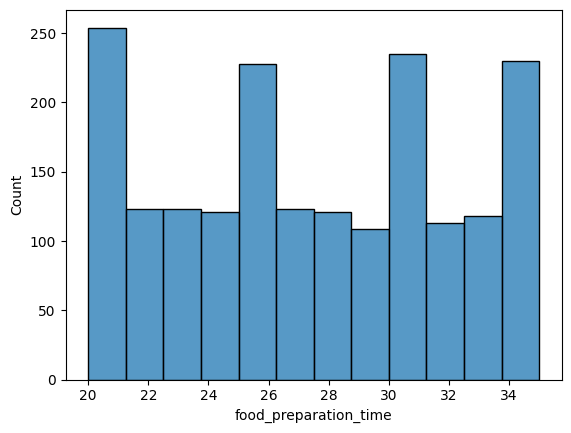

In [29]:
# Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

#histogram
sns.histplot(df['food_preparation_time'])
plt.show()

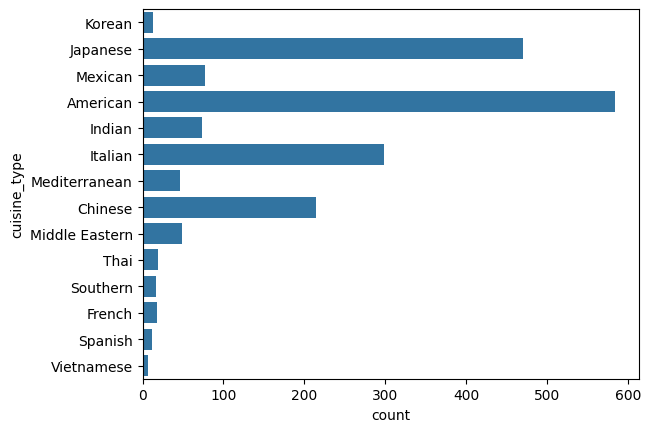

In [32]:
# countplots
sns.countplot(df['cuisine_type'])
plt.show()

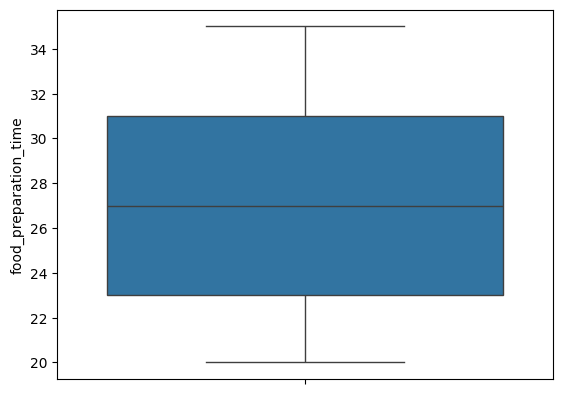

In [33]:
#  boxplots
sns.boxplot(df['food_preparation_time'])
plt.show()

In [34]:
# Which are the top 5 restaurants in terms of the number of orders received?
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [43]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [47]:
popular_cuisine_counts = df['cuisine_type'].value_counts().head()
popular_cuisine_counts

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77


In [48]:
popular_cuisine_counts.values

array([584, 470, 298, 215,  77])

In [53]:
# Which is the most popular cuisine on weekends?
most_popular = popular_cuisine_counts.head(1)
count = most_popular.values
count

array([584])

In [56]:
# What percentage of the orders cost more than 20 dollars
cost_of_the_order_20 = df[df['cost_of_the_order'] > 20]
percentage = (len('cost_of_the_orderr_20') / len(df)) * 100

print(f"Percentage of orders costing more than $20: {percentage:.2f}%")

Percentage of orders costing more than $20: 1.11%


In [57]:
# What is the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


In [58]:
# The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed
top_customers = df['customer_id'].value_counts().head(3)
print(top_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64



# **Multivariate Analysis**


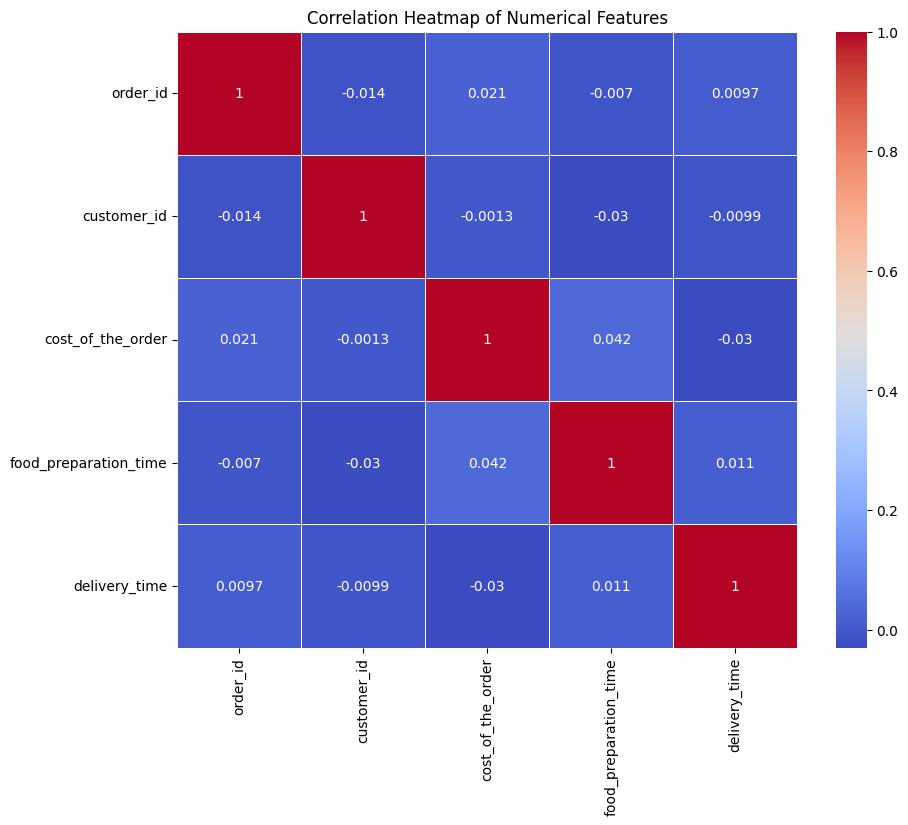

In [59]:
# Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
